In [18]:
# import required modules
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from NodeData import NodeData
from BTS import BSTNode
from RBTree import RBTree
from RBTree import Node
import pydot
from networkx.drawing.nx_agraph import graphviz_layout


'''
1.generate -> requirement => 1000 diem + HCM City => 
- generate random lat, long in HCM city => quick and dirty
- Find library open map => support lat long of real shop => use lat long to plot on map => accuracy + take time
2. plot => need library to plot => how to use it? => Input + output => input is generated data, output => map with ploted data
3.create tree from data + exist() => prepare input + call function
4.so sanh => observe => conclude
'''


'\n1.generate -> requirement => 1000 diem + HCM City => \n- generate random lat, long in HCM city => quick and dirty\n- Find library open map => support lat long of real shop => use lat long to plot on map => accuracy + take time\n2. plot => need library to plot => how to use it? => Input + output => input is generated data, output => map with ploted data\n3.create tree from data + exist() => prepare input + call function\n4.so sanh => observe => conclude\n'

## import required modules
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from NodeData import NodeData
from BTS import BSTNode
from RBTree import RBTree
from RBTree import Node
import pydot
from networkx.drawing.nx_agraph import graphviz_layout


'''
1.generate -> requirement => 1000 diem + HCM City => 
- generate random lat, long in HCM city => quick and dirty
- Find library open map => support lat long of real shop => use lat long to plot on map => accuracy + take time
2. plot => need library to plot => how to use it? => Input + output => input is generated data, output => map with ploted data
3.create tree from data + exist() => prepare input + call function
4.so sanh => observe => conclude
'''


In [5]:
#We will pick district 1 for stores location
place_name = "Ho Chi Minh City"

# read the graph from OpenStreetMap and convert it to Networkx data
osmG = ox.graph_from_address( place_name, dist = 1200 )
nodes, edges = ox.graph_to_gdfs( osmG )

/Users/thuannt.se/miniconda3/envs/ox/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/thuannt.se/miniconda3/envs/ox/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/thuannt.se/miniconda3/envs/ox/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


In [6]:
tags = {'shop': ['clothes', 'beverages', 'coffee', 'convenience', 'supermarket', 'shoes',
                'grocery', 'hobby', 'pharmacy', 'bakery', 'furniture', 'mobile_phone', 'gift', 'greengrocer'],
        'amenity': ['restaurant', 'bar', 'cafe', 'fast_food', 'pub']}
store_gdf = ox.geometries.geometries_from_address(place_name, dist=1200, tags=tags)
buildings = ox.geometries.geometries_from_address(place_name, dist=1200, tags={'building':True})
area = ox.geometries.geometries_from_place(place_name,  tags = {'building': True})



/Users/thuannt.se/miniconda3/envs/ox/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/thuannt.se/miniconda3/envs/ox/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/thuannt.se/miniconda3/envs/ox/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/thuannt.se/miniconda3/envs/ox/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/thuannt.se/miniconda3/envs/ox/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/thuannt.se/miniconda3/envs/ox/lib/python3.11/site-packages/s

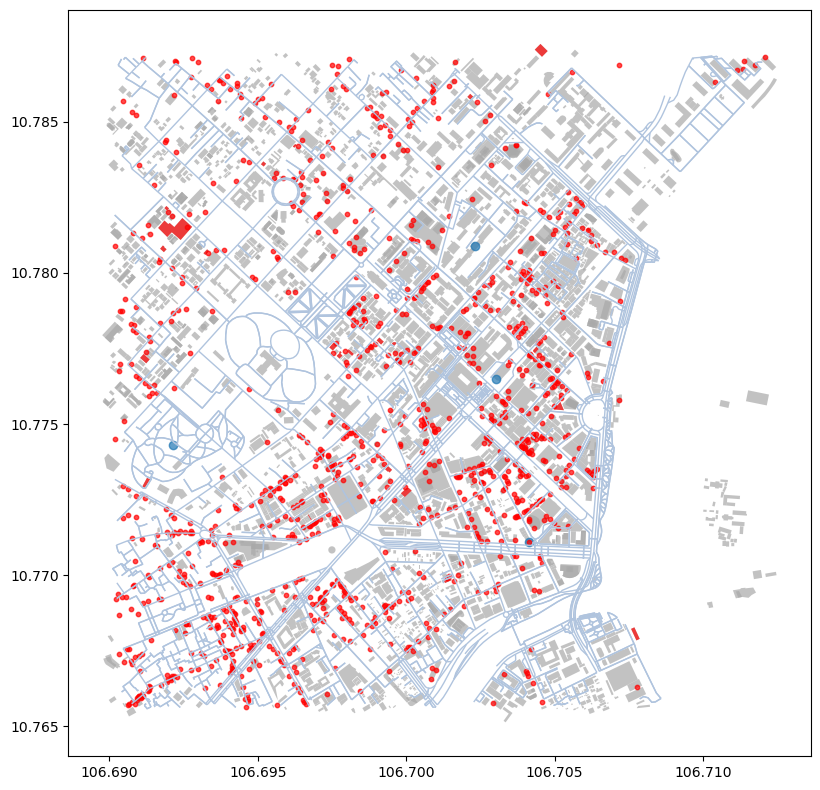

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor="lightsteelblue")

# Plot buildings
buildings.plot(ax=ax, facecolor="darkgrey", alpha=0.7)

# Plot store in yellow collor
store_gdf.plot(ax=ax, color="red", alpha=0.7, markersize=10)
plt.tight_layout()


In [8]:
#Extract data from gdf
store_data = {k:v for k, v in enumerate([(name, x,y) for name, x,y in zip(store_gdf.name, store_gdf.centroid.x , store_gdf.centroid.y)])}
store_object_list = [NodeData(i, data) for (i, data) in store_data.items()]


/var/folders/73/f6bjb2fs44n3qjx3xfv_d7ph0000gn/T/ipykernel_49972/2045895729.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  store_data = {k:v for k, v in enumerate([(name, x,y) for name, x,y in zip(store_gdf.name, store_gdf.centroid.x , store_gdf.centroid.y)])}
/var/folders/73/f6bjb2fs44n3qjx3xfv_d7ph0000gn/T/ipykernel_49972/2045895729.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  store_data = {k:v for k, v in enumerate([(name, x,y) for name, x,y in zip(store_gdf.name, store_gdf.centroid.x , store_gdf.centroid.y)])}


In [9]:
bst_store = BSTNode()
for obj in store_object_list:
    bst_store.insert(obj.id)
print("inorder:")
print(bst_store.inorder([]))

inorder:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

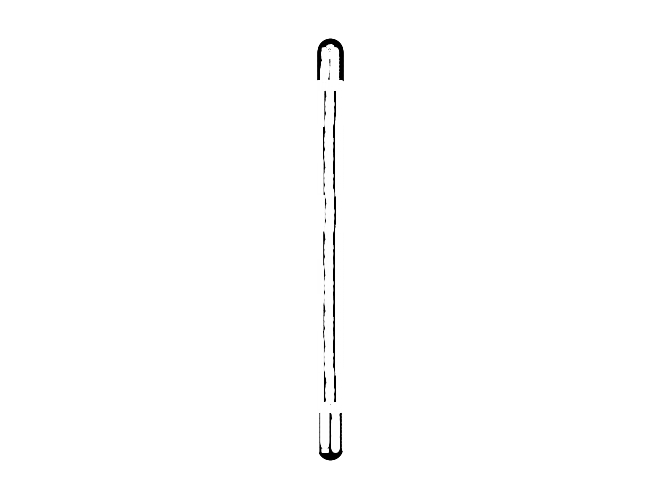

In [10]:
G = bst_store.tograph()

pos = graphviz_layout(G, prog="dot")
pos = {int(k):v for k,v in pos.items()}
nx.draw(G, pos, with_labels = True, node_color = "black", font_color = "white")

In [11]:
#Unlike BST tree, red black tree is a self balance tree, so whenever insert a node into the tree, it will re-arrange new node
#And self-balancing the whole tree

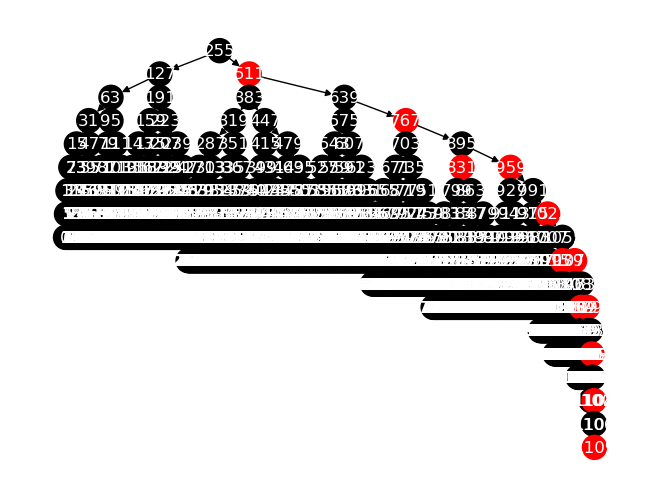

In [12]:
rbt = RBTree()
for obj in store_object_list:
    rbt.insert(obj.id)
G = rbt.tograph()

pos = graphviz_layout(G, prog="dot")
pos = {int(k):v for k,v in pos.items()}
colors = list(nx.get_node_attributes(G,'color').values())
nx.draw(G, pos, with_labels = True, node_color = colors, font_color = 'white')